# < Continuous Integration using GitHub Actions of Python Data Science Project >

## To-do List
* Jupyter Notebook with:
    - Cells that perform descriptive statistics using Polars or Panda.
    - Tested by using nbval plugin for pytest
* Python Script performing the same descriptive statistics using Polars or Panda
* lib.py file that shares the common code between the script and notebook
* Makefile with the following:
    - Run all tests (must test notebook and script and lib)
    - Formats code with Python black
    - Lints code with Ruff
    - Installs code via:  pip install -r requirements.txt
* test_script.py to test script
* test_lib.py to test library
* Pinned requirements.txt
* GitHub Actions performs all four Makefile commands with badges for each one in the README.md




In [1]:
# Build lib.py to adjust any system

import pandas as pd


# Load the dataset, which is .csv.
def load_data(dataset):
    """
    Load data from a file and return a DataFrame.
    """
    data = pd.read_csv(dataset)
    return data

         rownames         mpg   cylinders  displacement  horsepower  \
count  392.000000  392.000000  392.000000    392.000000  392.000000   
mean   198.520408   23.445918    5.471939    194.411990  104.469388   
std    114.438067    7.805007    1.705783    104.644004   38.491160   
min      1.000000    9.000000    3.000000     68.000000   46.000000   
25%     99.750000   17.000000    4.000000    105.000000   75.000000   
50%    198.500000   22.750000    4.000000    151.000000   93.500000   
75%    296.250000   29.000000    8.000000    275.750000  126.000000   
max    397.000000   46.600000    8.000000    455.000000  230.000000   

            weight  acceleration        year      origin  
count   392.000000    392.000000  392.000000  392.000000  
mean   2977.584184     15.541327   75.979592    1.576531  
std     849.402560      2.758864    3.683737    0.805518  
min    1613.000000      8.000000   70.000000    1.000000  
25%    2225.250000     13.775000   73.000000    1.000000  
50%   

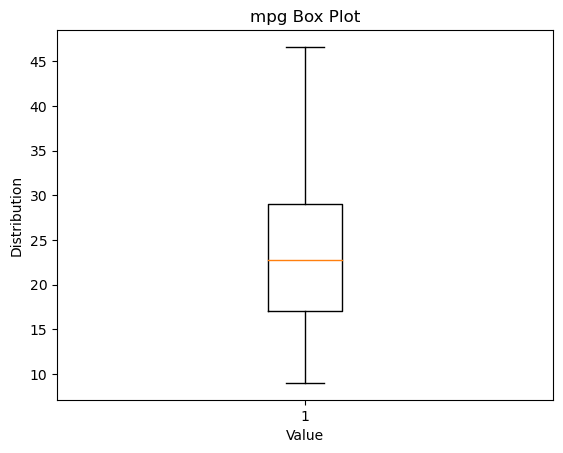

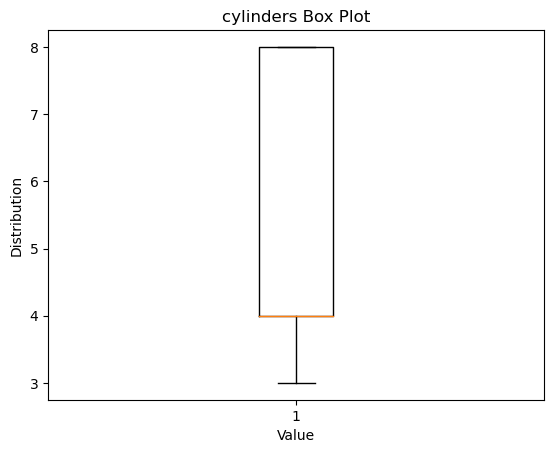

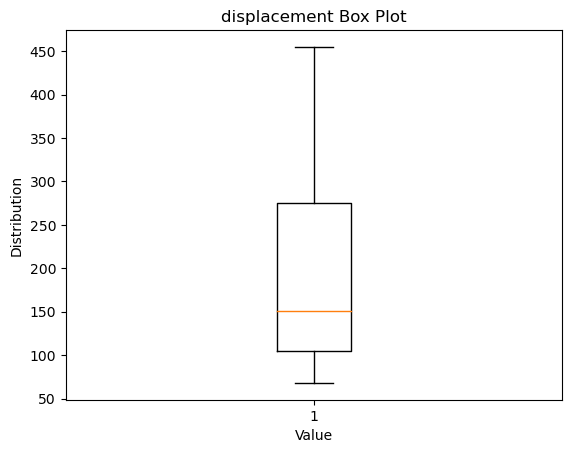

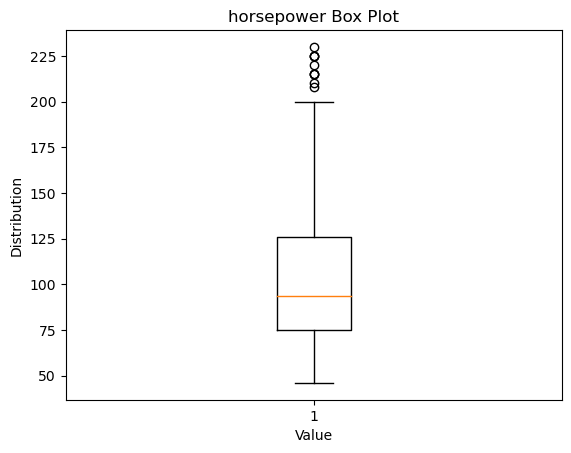

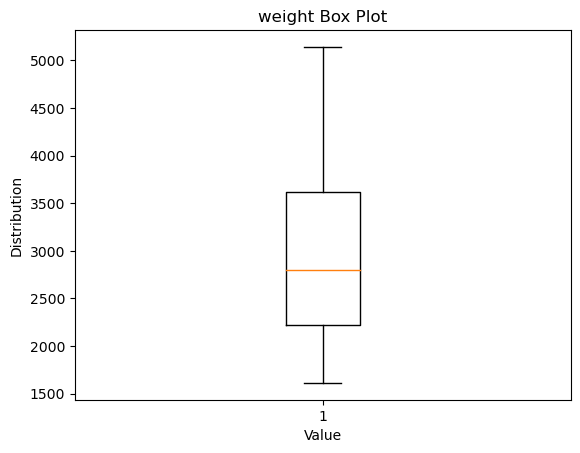

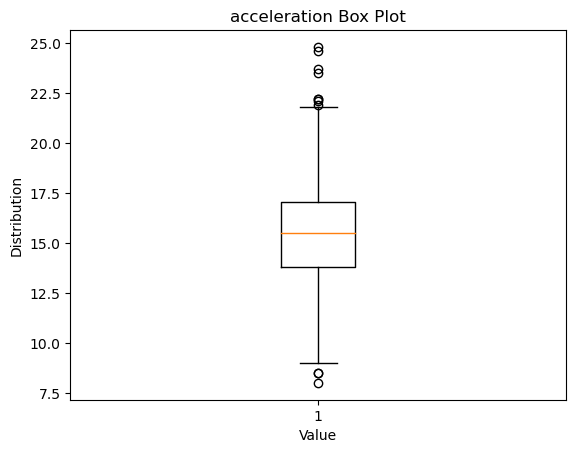

In [2]:
# Script.py using polars and matplotlib to set data and see some plot

import os
import matplotlib.pyplot as plt
from lib import load_data

my_data = "Auto.csv"


# Calculate mean, median, standard deviation of each columns
def calculate_stat(dataset):
    data = load_data(dataset)
    data_desc = data.describe()
    print(data_desc)
    return data_desc


# Make a boxplot of each columns in csv file
def build_boxplot(dataset):
    data = load_data(dataset)
    numeric_columns = data.select_dtypes(include=["number"]).columns

    directory_path = "C:/Users/User/.git/Suim-Park-Individual-Project-1/Outputs"
    folder_name = "Graphs"
    save_folder = os.path.join(directory_path, folder_name)

    # 폴더가 존재하지 않는 경우 폴더를 생성
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    for column in numeric_columns[1:7]:
        plt.figure()  # 새로운 그래프 생성
        plt.boxplot(data[column].to_list())  # Box Plot 그리기
        plt.title(f"{column} Box Plot")  # 그래프 제목 설정
        plt.xlabel("Value")  # x축 레이블 설정
        plt.ylabel("Distribution")  # y축 레이블 설정

        save_path = os.path.join(save_folder, f"boxplot {column}.png")
        plt.savefig(save_path)

        plt.show()
    return


if __name__ == "__main__":
    calculate_stat(my_data)
    build_boxplot(my_data)

In [3]:
# Test lib.py
from lib import load_data


def test_load_data():
    dataset = "Auto.csv"
    result_load = load_data(dataset)
    assert result_load is not None


if __name__ == "__main__":
    test_load_data()

         rownames         mpg   cylinders  displacement  horsepower  \
count  392.000000  392.000000  392.000000    392.000000  392.000000   
mean   198.520408   23.445918    5.471939    194.411990  104.469388   
std    114.438067    7.805007    1.705783    104.644004   38.491160   
min      1.000000    9.000000    3.000000     68.000000   46.000000   
25%     99.750000   17.000000    4.000000    105.000000   75.000000   
50%    198.500000   22.750000    4.000000    151.000000   93.500000   
75%    296.250000   29.000000    8.000000    275.750000  126.000000   
max    397.000000   46.600000    8.000000    455.000000  230.000000   

            weight  acceleration        year      origin  
count   392.000000    392.000000  392.000000  392.000000  
mean   2977.584184     15.541327   75.979592    1.576531  
std     849.402560      2.758864    3.683737    0.805518  
min    1613.000000      8.000000   70.000000    1.000000  
25%    2225.250000     13.775000   73.000000    1.000000  
50%   

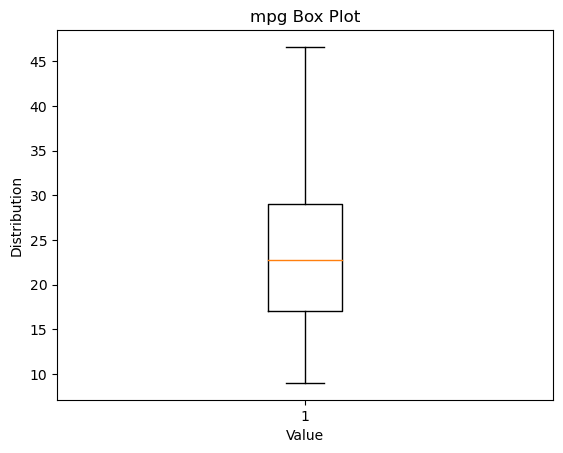

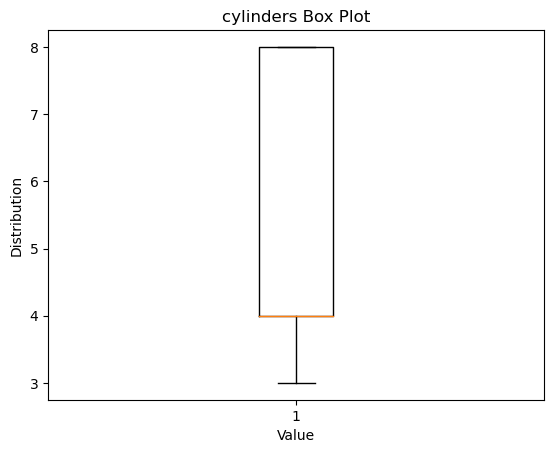

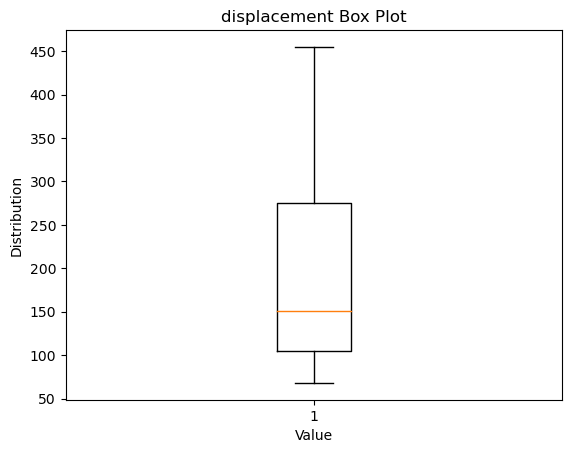

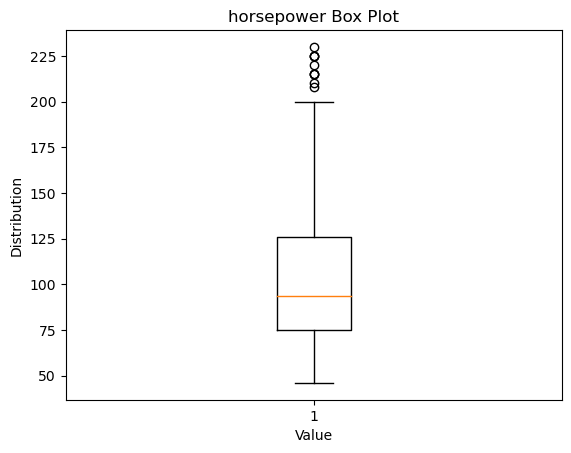

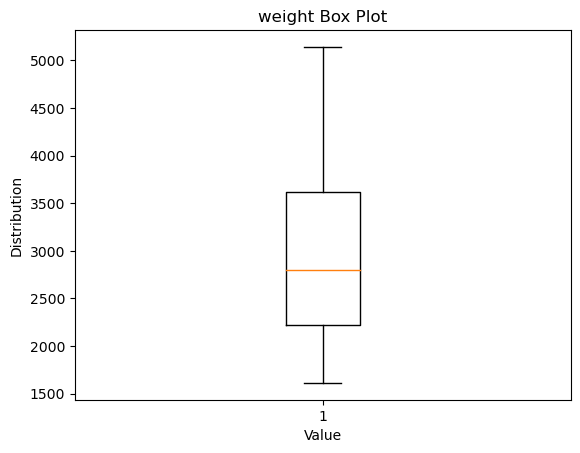

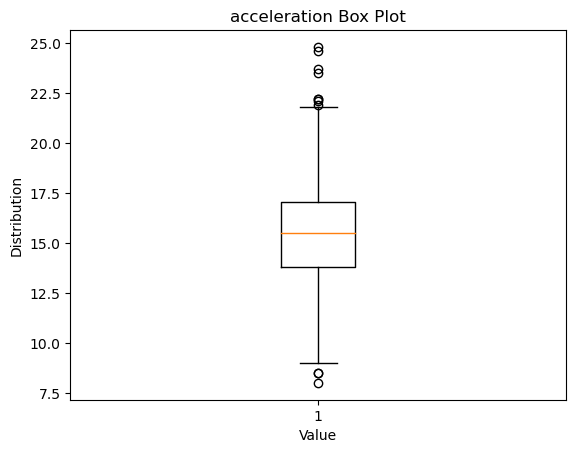

In [4]:
# Test lib.py
from script import calculate_stat, build_boxplot


def test_calculate_stat():
    dataset = "Auto.csv"
    result_stat = calculate_stat(dataset)
    assert result_stat is not None


def test_build_boxplot():
    dataset = "Auto.csv"
    result_boxplot = build_boxplot(dataset)
    assert result_boxplot is None


if __name__ == "__main__":
    dataset = "Auto.csv"
    test_calculate_stat()
    test_build_boxplot()